# Lab Assignment 2 – Soham Mehta

#### Your student code: 220038961
#### Repository URL: https://github.com/sohmehta/PY4SA23_Assignment.git

## Python Basics

### Task 1

Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric variable. Upper case text in the print statement should be replaced with the tested number.

In [24]:
x = 6 
if x % 3 == 0:
    print(str(x) + " is divisible by 3.")
else:
    print(str(x) + " is not divisible by three.") 
    

6 is divisible by 3.


### Task 2

Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.

In [26]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
item= "mango"
if item in fruits:
    print(item + " is acceptable.")
else:
    print(item + " is not acceptable.")


mango is not acceptable.


### Task 3

Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

In [61]:
!pip install haversine

In [81]:
import haversine as hs
#Calculating the distance between Agnes Blackadder Hall (loc1) & David Rusell Apartments (loc2), St Andrews, UK.
loc1=(56.3402,-2.8142)
loc2=(56.335165326,-2.820330052)
hs.haversine(loc1,loc2)

0.675398815208229

In [79]:
#Calculating distance using the formula: 
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

    c = 2 * asin(sqrt(a))

    r = 6371

    return(c * r)

lat1 = 56.3402
lat2 = 56.335165326
lon1 = -2.8142
lon2 = -2.820330052
print(distance(lat1, lat2, lon1, lon2), "km")

0.6753978823089409 km


## Pandas & NumPy

This exercise focuses on the use of Pandas to query and summarise data. You will need to import the NumPy and Pandas libraries. Produce code to answer the questions below. Deliver your results in a Jupyter Notebook. Make sure all questions and answers are clearly labelled.

The portland_park_trees.csv file contains information about individual trees in city parks in Portland, Oregon. These data were obtained from the City of Portland Office of Parks &Recreation (https://www.portlandoregon.gov/parks/article/433143).

In [57]:
import pandas as pd
import numpy as np

In [58]:
trees_df = pd.read_csv("Assignment 2 data/portland_park_trees.csv")
trees_df.head(5)

,fid,OBJECTID,Inventory_,Species,DBH,Condition,TreeHeight,CrownWidth,CrownWid_1,CollectedB,...,Genus,Common_nam,Genus_spec,Functional,Size,Native,Edible,Nuisance,Origin,Species_fa
0,1,426,2017/05/09,PSME,37.4,Fair,105.0,44.0,57.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
1,2,427,2017/05/09,PSME,32.5,Fair,94.0,49.0,45.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...
2,3,428,2017/05/09,CRLA,9.7,Fair,23.0,28.0,27.0,staff,...,Crataegus,Lavalle hawthorn,Crataegus x lavalleei,BD,S,No,NaN,NaN,North America - a hybrid between a Mexican and...,"Like most hawthorns, the tree has stout thorns..."
3,4,429,2017/05/09,QURU,10.3,Poor,28.0,38.0,31.0,staff,...,Quercus,northern red oak,Quercus rubra,BD,L,No,NaN,NaN,North America - eastern Canada and eastern USA...,Acorns take two years to mature and are an imp...
4,5,430,2017/05/09,PSME,33.2,Fair,102.0,43.0,44.0,staff,...,Pseudotsuga,Douglas-fir,Pseudotsuga menziesii,CE,L,Yes,NaN,NaN,North America - from British Columbia south to...,Bracts on cones look like a mouse's feet and t...


In [59]:
trees_df.shape

(25534, 40)

**Question 1**: How many trees are of the Quercus or Acer genus? 

In [60]:
sample1 = trees_df.query('Genus== "Acer" or Genus =="Quercus"')
print (len(sample1))

5675


**Question 2**: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [61]:
sample2 = trees_df.query('Genus=="Acer" or Genus == "Quercus" and DBH > 50')
print(len(sample2))
print('')

3666



**Question 3**: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [62]:
sample_genus = trees_df.query('Genus=="Acer" or Genus=="Quercus" or Genus=="Fraxinus"')
sample_genus.groupby('Genus')['DBH'].mean()

#Quercus has the highest mean DBH in comparison to Acer and Fraxinus genuses.

Genus
Acer        18.419085
Fraxinus    11.033610
Quercus     23.568238
Name: DBH, dtype: float64

**Question 4**: How many different species of trees are recorded in the Acer genus?

In [63]:
just_Acer = trees_df[trees_df["Genus"]=="Acer"]
just_Acer['Genus_spec'].nunique()

20

In [64]:
#just double checking the number of different species of trees grouped by Genus. 
trees_df.groupby('Genus')['Genus_spec'].nunique()
#20 different species of trees are recorded in the Acer genus confirmed.

Genus
Abies            10
Acer             20
Aesculus          7
Ailanthus         1
Albizia           1
                 ..
Unknown           1
Viburnum          1
Xanthocyparis     1
Zelkova           1
x                 2
Name: Genus_spec, Length: 117, dtype: int64

The world_cities.csv is a file that contains cities, countries, population, coordinates (geographic) and a Boolean attribute that defines if the city is the capital city or not. Read this file as a Pandas dataframe and create the required scripts to:

In [73]:
cities_df = pd.read_csv("Assignment 2 data/world_cities.csv")
cities_df.head(5)

,city,country,pop,lat,lon,capital
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0
4,'Abud,Palestine,2456,32.03,35.07,0


**Question 5**: 
- Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column.
- Remove the original "pop" column.
- Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name is Michael).
- Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.
- Print the result; Make sure you write the scripts in different code cells where you describe the process.

In [76]:
cities_df['pop_M']=cities_df.loc[:, 'pop']
cities_df.head(5)

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,5629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,18999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,47788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,21817
4,'Abud,Palestine,2456,32.03,35.07,0,2456


In [78]:
#turning the data into millions
def to_million(x):
    return x/1000000
cities_df.pop_M = cities_df.pop_M.apply(to_million)

#removing the 'pop' column
cities_df.drop(['pop'], inplace = True, axis=1)
cities_df.head(5)

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


In [82]:
#Chose 'Shanghai' as a city that starts the same letter as my first name 'Soham.'
just_s = cities_df.query('city=="Shanghai"')
print(just_s)

           city country    lat     lon  capital      pop_M
34722  Shanghai   China  31.23  121.47        2  15.017783


In [88]:
#Subset the cities_df to just China cities
china_cities= cities_df.query('country=="China"')

#Subset the 5 largest populus cities from China.
largestcities_china= china_cities.nlargest(5, ['pop_M'])
print(largestcities_china)

            city country    lat     lon  capital      pop_M
34722   Shanghai   China  31.23  121.47        2  15.017783
3825     Beijing   China  39.93  116.40        1   7.602069
41906      Wuhan   China  30.58  114.27        3   4.236023
7594   Chongqing   China  29.57  106.58        2   4.133663
41966       Xian   China  34.27  108.90        0   4.091916


## Python Data Visualization

Using the same dataset portland_park_trees.csv, create using seaborn, pandas or matplotlib libraries the following charts:

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [92]:
trees= pd.read_csv("Assignment 2 data/portland_park_trees.csv")
trees.columns =[column.replace(" ", "_") for column in trees.columns]

**Graph 1**: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.).

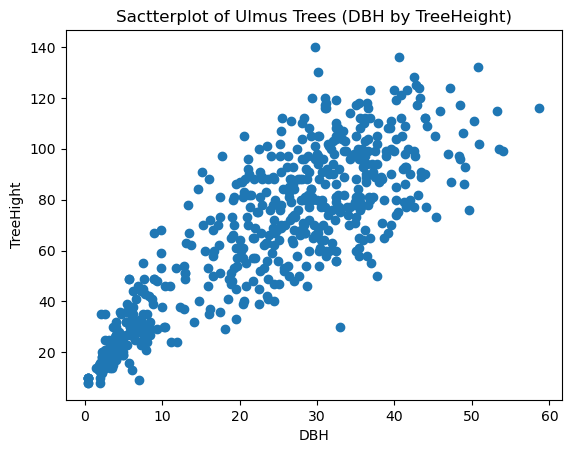

In [93]:
just_ulmus = trees.query('Genus=="Ulmus"')
sp1 = plt.scatter(just_ulmus.DBH, just_ulmus.TreeHeight)
plt.title('Sactterplot of Ulmus Trees (DBH by TreeHeight)')
plt.xlabel("DBH")
plt.ylabel("TreeHight")
plt.show(sp1)

**Graph 2**: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

Text(0.5, 1.0, 'Sactterplot of Ulmus Trees (DBH by TreeHeight) differentiated by species')

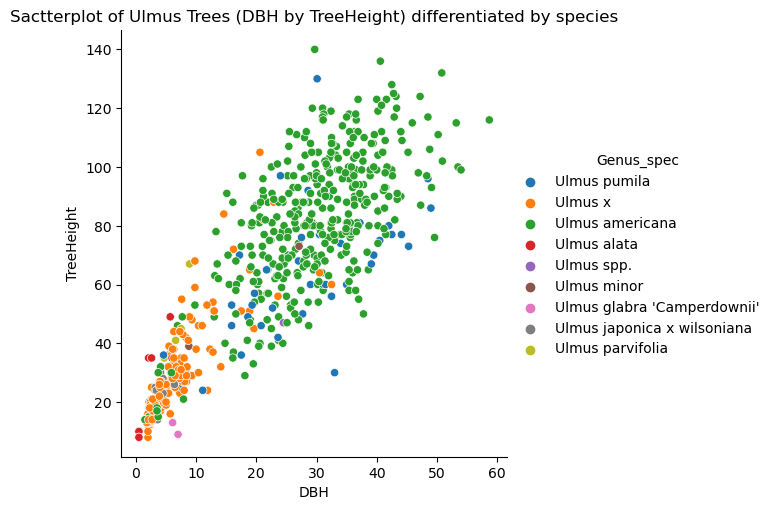

In [94]:
g2=sns.relplot(x="DBH", y="TreeHeight", hue="Genus_spec", data=just_ulmus)
plt.title('Sactterplot of Ulmus Trees (DBH by TreeHeight) differentiated by species')

**Graph 3**: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot).

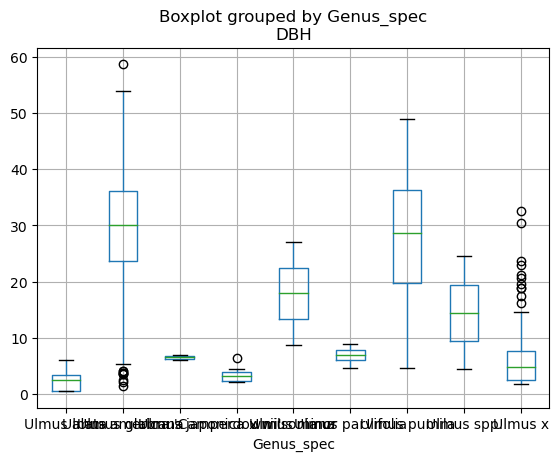

In [95]:
g3=just_ulmus.boxplot(column='DBH', by='Genus_spec')

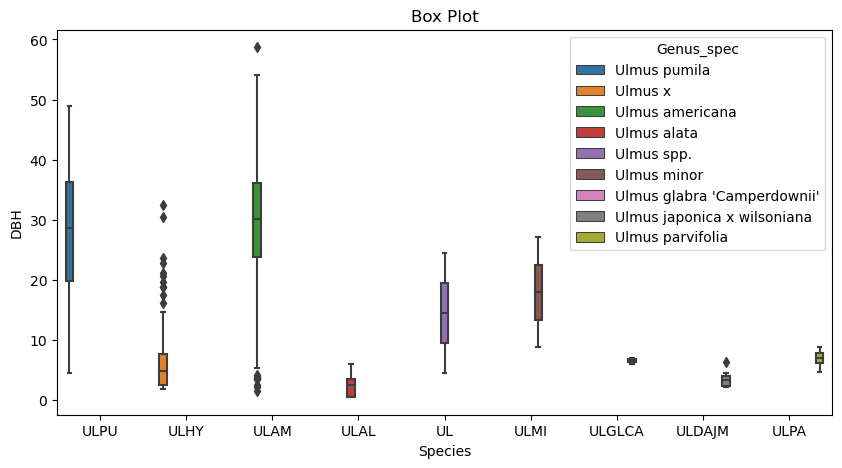

In [99]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=just_ulmus, x='Species', y='DBH', hue='Genus_spec')
plt.title('Box Plot')
plt.show()


**Graph 4**: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs

In [ ]:
#code here

## Python GeoPandas

Go to the Spatial Data Portal of Scotland and find any spatial data that you find interesting in a shapefile format. Download this data and Produce code to complete the requested tasks.

In [104]:
import geopandas as gpd

**Task 1**: Read the selected dataset as GeoPandas DataFrame

In [120]:
#From the Spatial Data Portal of Scotland, I downloaded "Scottish Index of Multiple Deprivation (SIMD) 2016", similar to our lab notebooks where we looked at SIMD in 2020.
spark = gpd.read_file('Assignment 2 data/CNTRYPK_SCOTLAND_ESRI/CNTRYPK_SCOTLAND.shp')

**Task 2**: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [121]:
spark.head(5)

,NAME,PA_CODE,STATUS,SITE_HA,geometry
0,Plean,10248,Current,89.49,"POLYGON ((283124.030 687499.070, 283114.130 68..."
1,Cathkin Braes,10249,Current,169.14,"POLYGON ((261534.850 658751.400, 261537.800 65..."
2,Dams to Darnley,10251,Current,552.77,"POLYGON ((253060.675 659581.549, 253050.562 65..."
3,Aden,8682,Current,86.81,"POLYGON ((397993.531 847168.563, 397984.438 84..."
4,Haddo,8703,Current,73.91,"POLYGON ((386804.500 834524.500, 386852.094 83..."


In [122]:
spark.tail(5)

,NAME,PA_CODE,STATUS,SITE_HA,geometry
47,Roslin Glen,10250,Current,27.75,"POLYGON ((326955.530 662690.220, 326947.370 66..."
48,Roslin Glen,10250,Current,27.75,"POLYGON ((326847.128 662683.327, 326853.665 66..."
49,Roslin Glen,10250,Current,27.75,"POLYGON ((327380.315 662831.010, 327385.680 66..."
50,Plean,10248,Current,89.49,"POLYGON ((282482.050 686727.830, 282482.340 68..."
51,Muiravonside,8710,Current,64.83,"POLYGON ((295188.656 674897.875, 295082.063 67..."


**Task 3**: Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.

In [123]:
spark.explore(column='NAME', cmap='RdYlBu')

**Task 4**: What is the Coordinate Reference System of the selected dataset?

In [124]:
spark.crs

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

**Task 5**: How many features does the selected dataset contain?

In [ ]:
spark.shp

**Task 6**: Define a sub-setting criterion to create a new geopandas dataframe where you filter the
selected dataset based on a categorical attribute/

In [ ]:
#Filtering the projected dataset based on a categorical attribute (XYZ)


**Task 7**: Define a sub-setting criterion to create a new geopandas dataframe where you filter the
selected dataset based on a numerical attribute

In [ ]:
#Filtering the projected dataset based on a numerical attribute (XYZ)


**Task 8**: Plot the new/filtered geopandas dataframe using one of the attributes to create a
choropleth map.

In [ ]:
stat1.plot(column="Pop20", edgecolor="black", cmap="Reds", legend=True);

## Python Rasterrio

The dataset for this part of the assignment is elev.tif a 30 m spatial resolution digital elevation model (DEM) derived from the National Elevation Dataset (NED) in Canada with elevation in meters.

In [351]:
import rasterio as rio
from rasterio import plot
from matplotlib import pyplot


In [20]:
import matplotlib.pyplot as plt
import rasterio as rio
import earthpy as et
import earthpy.plot as ep
import numpy as np

**Task 1**: Read the file as a rasterio dataset.

In [32]:
elev = rio.open('Assignment 2 data/elev.tif')

**Task 2**: What is the CRS of the dataset?

In [33]:
print(elev.crs)

EPSG:32617


**Task 3**: Describe the raster dataset regarding the raster extent (bounds), the reference system, and
how many bands are in this dataset.

In [52]:
print(elev.width)
print(elev.height)
print(elev.count)
print(elev.bounds)


6303
5897
1
BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)


In [102]:
elev_arr = elev.read(1, masked=True)
elev_arr

print("the minimum raster value is: ", elev_arr.min())
print("the maximum raster value is: ", elev_arr.max())

the minimum raster value is:  28
the maximum raster value is:  1490


**Task 4**: Create a plot/map of the raster dataset.

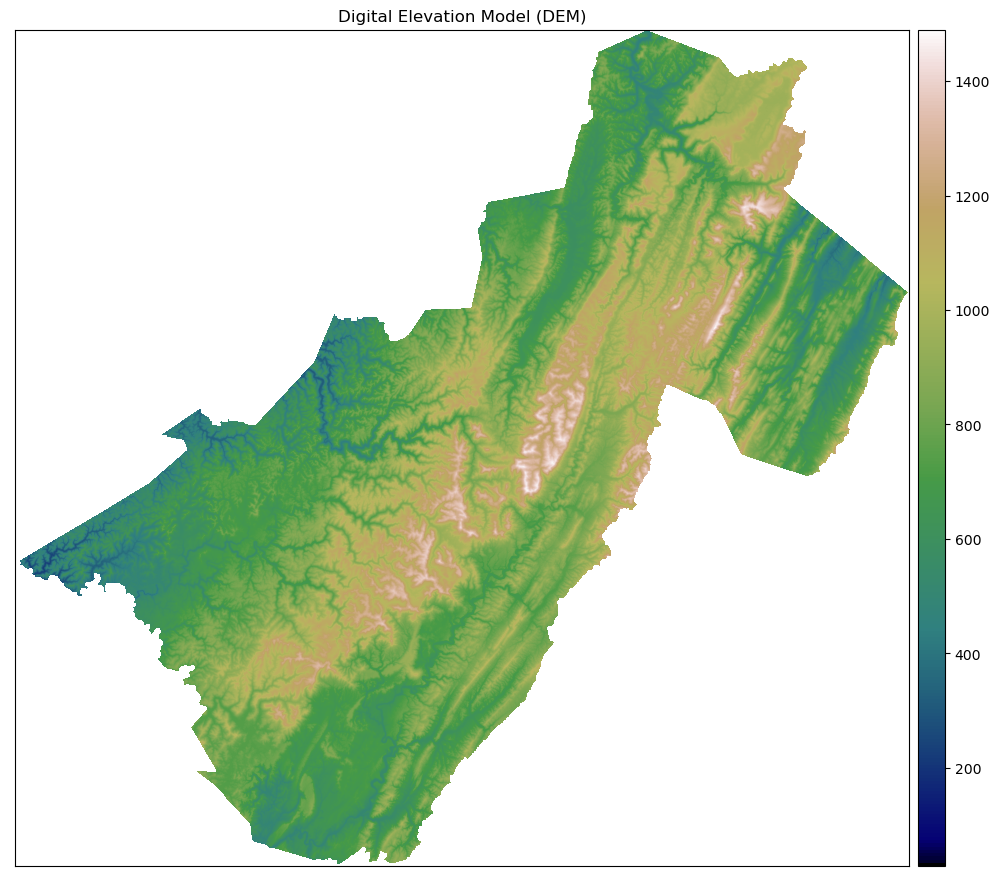

<function matplotlib.pyplot.show(close=None, block=None)>

In [50]:
ep.plot_bands(elev_arr,
              title="Digital Elevation Model (DEM)",
              cmap="gist_earth")
plt.show

**Task 5**: Create Histograms from the raster.

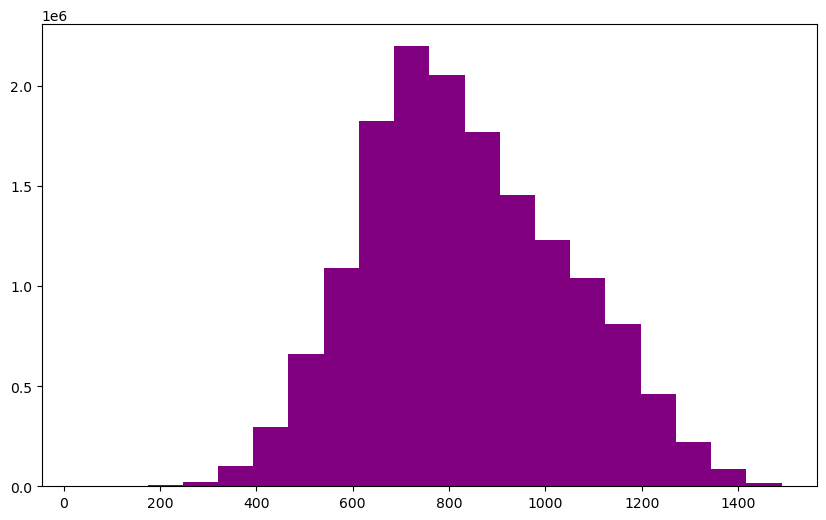

In [51]:
ep.hist(elev_arr,
        figsize=(10, 6))
plt.show()

## The End!